# 1.このSprintについて
Sprintの目的
スクラッチを通して線形回帰を理解する
オブジェクト指向を意識した実装に慣れる
数式をコードに落とし込めるようにする
どのように学ぶか
スクラッチで線形回帰を実装した後、学習と検証を行なっていきます。

# 2.線形回帰スクラッチ
線形回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLinearRegressionクラスにコードを書き加えていってください。

## データを読み込む

In [1]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
def scratch_train_test_split(X, y, train_size=0.8,):
    """
    検証用データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      学習データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    import numpy as np
    
    per = len(y) #サンプル数(インデックス数)を取得
    split_size = int(per*train_size) #train_sizeでサンプル数を分ける
    shuffle_index = np.random.permutation(per) #sampleのインデックスをshuffleして変数に格納
    #インデックスをshuffle_index、split_sizeでスライスしていく
    X_train = X[shuffle_index][:split_size]
    X_test = X[shuffle_index][split_size:]
    y_train = y[shuffle_index][:split_size]
    y_test = y[shuffle_index][split_size:]
    
    return X_train, X_test, y_train, y_test

In [3]:
import pandas as pd

pd.set_option('display.max_columns', 200)# 表示する列名を省略しない

df = pd.read_csv('train.csv')
df.head()

X = df[['GrLivArea', 'YearBuilt']] # 2つの特徴量を抜き出し変数に格納
y = df[['SalePrice']] # 目的変数を抜き出し、変数に格納

X = X.astype('float64')
y = y.astype('float64')


In [4]:
#train_test_split
X_train, X_test, y_train, y_test = scratch_train_test_split(X.values, y.values, 0.8)

#標準化処理を行う
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#　標準化する
scaler = StandardScaler()
scaler.fit(X_train)
# 標準化変形する

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)



## 雛型

In [5]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
       
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        if self.verbose:
            j_theta = 1/ (2*Xshape[0]) * ((_linear_hypothesis(self, X) - y)**2)
            #verboseをTrueにした際は学習過程を出力
            print()
        pass


    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        y_pred = np.dot(X, self.coef_) # thetaは最急降下法で求めたもの,
        
        return y_pred

# 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。  

$$
h_
θ
(
x
)
=
θ_
0
x_
0
+
θ_
1
x_
1
+
.
.
.
+
θ_
j
x_
j
+
.
.
.
+
θ_
n
x_
n
.
(
x_
0
=
1
)
$$

x : 特徴量ベクトル  
θ: パラメータベクトル  
n: 特徴量の数  
$x_j$: j番目の特徴量   
$θ_j$: j番目のパラメータ（重み）
特徴量の数$
n$は任意の値に対応できる実装にしてください。  
なお、ベクトル形式で表すと以下のようになります。  

$$
h_
θ
(
x
)
=
θ^
T
⋅
x
.
$$

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## 確認用に適当な値をX,theta,alpha,yを決める

In [7]:
#4*2の特徴量にx0の1を追加すると４＊３
X_0 = np.random.rand(4, 2)
print("X_0 : \n{}".format(X_0))
# 重みtheta
theta_0 = np.random.rand(3)
print("theta_0 : \n{}".format(theta_0))
# 学習率alpha
alpha = 0.01
# 目的変数ｙ
y = np.random.rand(4)
print("目的変数ｙ : {}".format(y))
print("X_1:shape : {}".format(X_0.shape))
print("theta_0:shape : {}".format(theta_0.shape))

X_0 : 
[[0.14677465 0.69313457]
 [0.01521224 0.65264412]
 [0.7150455  0.20106921]
 [0.80521941 0.93187762]]
theta_0 : 
[0.18526775 0.85697599 0.02970867]
目的変数ｙ : [0.58503528 0.77647975 0.42155083 0.45462787]
X_1:shape : (4, 2)
theta_0:shape : (3,)


## 仮定関数

In [8]:
def _linear_hypothesis(X, theta):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    
    X = np.insert(X, 0, np.ones(X.shape[0]), axis=1) # Xの0列目に１を代入
    #theta = np.random.rand(X.shape[1], 1) # thetaを定義
    f_x = np.dot(X, theta.T) # Xとthetaの内積
    
    return f_x

### 確認

In [9]:
#確認

print(_linear_hypothesis(X_0, theta_0))

[0.33164221 0.21769347 0.80401808 0.9030063 ]


## クラス用

In [10]:
# クラス用

def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    
    X = np.insert(X, 0, np.ones(X.shape[0]), axis=1) # Xの0列目に１を代入
    f_x = np.dot(X, self.coef_.T) # Xとthetaの内積
    
    return f_x

# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。  

$$
θ_j:=θ_j−α\frac{1}{m}\sum_{i=0}^{m} \quad[(h_θ(x^{(i)})−y^{(i)})x^{(i)}_j]
$$  

α: 学習率   
i : サンプルのインデックス  
j : 特徴量のインデックス  

雛形として用意されたメソッドや関数以外でも必要があれば各自作成して完成させてください。雛形を外れても問題ありません。

[初歩からの機械学習：最急降下法による重回帰モデル～PythonとRでスクラッチから～](https://www.medi-08-data-06.work/entry/grad_desc_reg#%E6%9C%80%E6%80%A5%E9%99%8D%E4%B8%8B%E6%B3%95%E3%81%AB%E3%82%88%E3%82%8B%E9%87%8D%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB)

In [11]:
print(theta_0)
print(X_0)

[0.18526775 0.85697599 0.02970867]
[[0.14677465 0.69313457]
 [0.01521224 0.65264412]
 [0.7150455  0.20106921]
 [0.80521941 0.93187762]]


In [12]:
#　最適なパラメータthetaを求める

def _gradient_descent(theta, alpha, X, y):
    """
    y : 目的変数（ベクトル）
    theta : thetaの初期値（重みベクトル）
    itera : 繰り返し回数
    X : 特徴量（行列）
    alpha : 学習率
    
    """
    
    X = np.insert(X, 0, np.ones(X.shape[0]), axis=1) # Xの0列目に１を代入
    f_x = np.dot(X, theta.T) # Xとthetaの内積
    error = f_x - y #差分（ベクトル）
    theta = theta - alpha / X.shape[0] * (np.dot(error.T, X)) #最急降下法
    
    return theta

### 確認

In [13]:
_gradient_descent(theta_0, alpha, X_0, y)
# 最適なパラメータが求まる

array([0.18522108, 0.85550391, 0.02982264])

## errorを求める

In [14]:
# error = f_x - y

## クラス用

In [15]:
def _gradient_descent(self, X, error):
    """
    X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
    error : 次の形のndarray, shape (n_samples, )
    """
    self.coef_ = self.coef_ - self.lr / X.shape[0] * (np.dot(error.T, X)) #最急降下法
    
    return self.coef_

# 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数   $
h
θ
(
x
)
$ の出力が推定結果です。

In [16]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass


    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """

        pass
        return

In [17]:
def predict(X, theta):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        y_pred = np.dot(X, theta) # thetaは最急降下法で求めたもの,
        
        
        return y_pred
        

In [18]:
# 確認  np.insert(X, 0, np.ones(X.shape[0]), axis=1)
predict_y =  predict(np.insert(X_0, 0, 1, axis=1), theta_0)
print(predict_y)

[0.33164221 0.21769347 0.80401808 0.9030063 ]


# 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。  

平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。  

平均二乗誤差は以下の数式で表されます。  

$$
L(θ)=1mm∑i=1 (h_θ(x^{(i)})−y^{(i)})^2.
$$

m : 入力されるデータの数  
$h_θ()$ : 仮定関数  
$x^{(i)}$ : i番目のサンプルの特徴量ベクトル  
$y^{(i)}$ : i番目のサンプルの正解値  

なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）

In [19]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    m = y_pred.shape[0] # 入力されるデータ数＝y_predの行数
    
    mse = (1/m)* np.sum((y_pred - y)**2)
    
    return mse

In [20]:
MSE(predict_y, y)

0.18094364149600836

# 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

# クラス作成

In [21]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=300, lr=0.02, bias=True, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter # 学習回数
        self.lr = lr # 学習率
        self.bias = bias # バイアス項（切片）
        self.verbose = verbose # 学習過程を出力するか否か
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
        #パラメータを用意
        np.random.seed(5)
        self.coef_ = 0
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
         # バイアス項を入れる
        hoge = np.ones((X.shape[0],1))
        if self.bias == False:
            # Xの0列目に１を代入
            X = np.concatenate([hoge,X],axis=1)
            
            #検証用データ有り
            if X_val is not None and y_val is not None:
                hoge_0 = np.ones((X_val.shape[0],1))
                # X_valの0列目に１を代入
                X_val = np.concatenate([hoge_0, X_val],axis=1)
        
        #パラメータの初期値
        np.random.seed(51)
        self.coef_ = np.random.rand(X.shape[1])#[np.newaxis, :]
        self.coef_ = self.coef_[np.newaxis, :]
        
        #カウント
        count = 0
        
        #学習
        #verboseをTrueにした際は学習過程を出力
        for i in range(self.iter):
            
            #仮定関数
            f_x = self._linear_hypothesis(X)
            # errorを定義
            error = f_x - y
            #パラメータを更新していく    _gradient_descent(self, X, error)
            self.coef_ = self._gradient_descent(X, error)
            #学習データの損失を記録する
            m = MSE(f_x, y) / 2
            self.loss[i] = m
            
            # 検証用データ有り,損失を記録
            if X_val is not None and y_val is not None:
                f_x_1 = self._linear_hypothesis(X_val)
                self.val_loss[i] = MSE(f_x_1, y_val) / 2
                
            #verboseをTrueにした際は学習過程を出力
            if self.verbose== True:
                count += 1
                print("{}回目の学習用データは : {}".format(count, self.loss[i]))
                # 検証用データ有り
                if X_val is not None and y_val is not None:
                    print("{}回目の検証用データは : {}".format(count, self.val_loss[i]))
                

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        
        self.y_pred = np.dot(X, self.coef_.T) # thetaは最急降下法で求めたもの,
        
        return self.y_pred
    
    

    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """

        #X = np.insert(X, 0, np.ones(X.shape[0]), axis=1) # Xの0列目に１を代入
        self.f_x = np.dot(X, self.coef_.T) # Xとthetaの内積

        return self.f_x
    
    def _gradient_descent(self, X, error):
        """
        X : 次の形のndarray, shape (n_samples, n_features)
                学習用データの特徴量
         error : 次の形のndarray, shape (n_samples, )

        """

        self.coef_ = self.coef_ - self.lr / X.shape[0] * (np.dot(error.T, X)) #最急降下法

        return self.coef_

    def MSE(y_pred, y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        m = self.y_pred.shape[0] # 入力されるデータ数＝y_predの行数

        mse = ((1/m)* np.sum((y_pred - y)**2))

        return mse

# 3.検証

# 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

## 学習、推定

In [22]:
#biasなし、出力なし
slr = ScratchLinearRegression(num_iter=300, lr=0.02, bias=True, verbose=False)
slr.fit(X_train_transformed, y_train, X_test_transformed, y_test)

# 推定
predict_slr = slr.predict(X_test_transformed)
# print(predict_slr)
print("自作MSE：{}".format(MSE(predict_slr, y_test)))
print("SklearnMSE : {}".format(mean_squared_error(y_test, predict_slr)))

自作MSE：35470064004.25005
SklearnMSE : 35470064004.25005


## 学習曲線

In [23]:
#biasあり、出力あり
slr_0 = ScratchLinearRegression(num_iter=300, lr=0.02, bias=False, verbose=True)
slr_0.fit(X_train_transformed, y_train, X_test_transformed, y_test)

1回目の学習用データは : 19198217940.855957
1回目の検証用データは : 20021236254.725163
2回目の学習用データは : 18464849359.971966
2回目の検証用データは : 19269596723.888573
3回目の学習用データは : 17761198937.873287
3回目の検証用データは : 18548386460.467163
4回目の学習用データは : 17086057739.631935
4回目の検証用データは : 17856365884.061497
5回目の学習用データは : 16438266222.492281
5回目の検証用データは : 17192346186.86942
6回目の学習用データは : 15816712208.234367
6回目の検証用データは : 16555187243.08003
7回目の学習用データは : 15220328939.214273
7回目の検証用データは : 15943795604.813385
8回目の学習用データは : 14648093214.608358
8回目の検証用データは : 15357122581.003277
9回目の学習用データは : 14099023603.53352
9回目の検証用データは : 14794162395.770845
10回目の学習用データは : 13572178731.854305
10回目の検証用データは : 14253950422.981592
11回目の学習用データは : 13066655639.620935
11回目の検証用データは : 13735561493.816647
12回目の学習用データは : 12581588206.209858
12回目の検証用データは : 13238108274.321814
13回目の学習用データは : 12116145640.360495
13回目の検証用データは : 12760739710.024952
14回目の学習用データは : 11669531032.418964
14回目の検証用データは : 12302639534.833847
15回目の学習用データは : 11240979966.211645
15回目の検証用データは : 11863024841.543339
1

# 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

プロット例
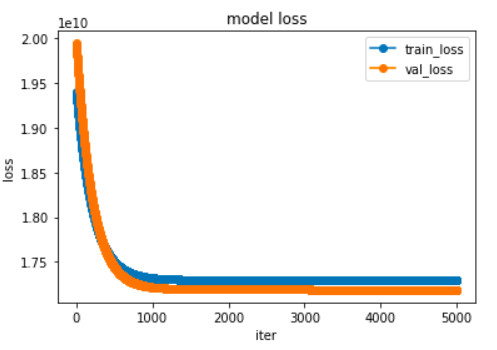


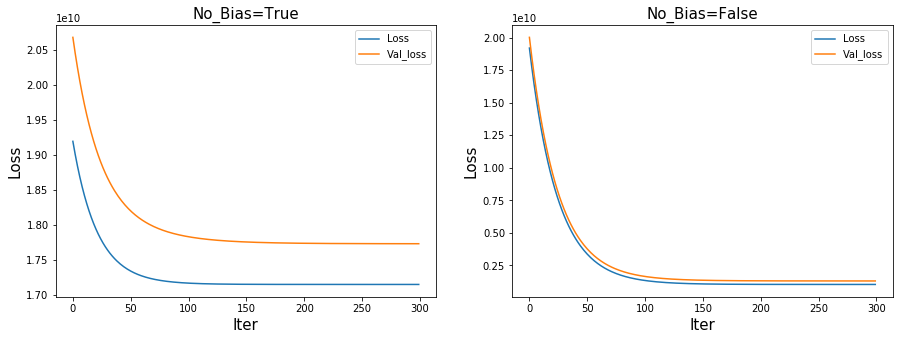

In [24]:
loss =  slr.loss
val_loss = slr.val_loss

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('No_Bias=True', fontsize=15)
plt.xlabel('Iter', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.plot(range(len(loss)), loss, label='Loss')
plt.plot(range(len(val_loss)), val_loss, label='Val_loss')
plt.legend()


loss =  slr_0.loss
val_loss = slr_0.val_loss

plt.subplot(1, 2, 2)
plt.title('No_Bias=False', fontsize=15)
plt.xlabel('Iter', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.plot(range(len(loss)), loss, label='Loss')
plt.plot(range(len(val_loss)), val_loss, label='Val_loss')
plt.legend()
plt.show()

# 【問題8】（アドバンス課題）バイアス項の除去
バイアス項 
θ
0
 を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。